In [1]:
#import dependancies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

#imports weather API keys
from config import weather_api_key
from goog_config import goog_config

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
coordinates = list(lat_lngs)

In [4]:
coordinates

[(-89.21606250388615, -9.404067240999638),
 (-28.457322392793735, 174.55580742528804),
 (-27.286939763088768, -20.220851699900777),
 (50.19700005358561, -93.31022363183591),
 (-8.726890392520204, -7.443601175171551),
 (-48.58471259879369, -4.136904957523797),
 (-32.376286354039514, -25.39904058261061),
 (9.23064741379305, 104.01152784707114),
 (-24.86960162903658, 176.5218331858585),
 (11.152448884862622, -116.60518969440234),
 (47.33149781045452, -149.87180426858725),
 (-73.39809626323037, 34.52145991656468),
 (-19.640861728730727, 26.914682164251104),
 (88.72577425889767, 62.62470048370514),
 (49.940586388976925, -19.58410421294124),
 (64.23348523689958, -144.49979806475687),
 (53.10490295954577, 8.089999998993136),
 (70.51280314656807, 0.9707069669868247),
 (-62.4224855690658, 86.92226381253681),
 (8.27881029762679, -139.83661814322807),
 (-65.05266154637299, -158.34158214280043),
 (-11.41768362420612, 164.75403967304493),
 (31.31850611573374, -23.838585822765623),
 (-9.253004654387

In [5]:
for coordinate in coordinates:
    print(coordinate[0],coordinate[1])

-89.21606250388615 -9.404067240999638
-28.457322392793735 174.55580742528804
-27.286939763088768 -20.220851699900777
50.19700005358561 -93.31022363183591
-8.726890392520204 -7.443601175171551
-48.58471259879369 -4.136904957523797
-32.376286354039514 -25.39904058261061
9.23064741379305 104.01152784707114
-24.86960162903658 176.5218331858585
11.152448884862622 -116.60518969440234
47.33149781045452 -149.87180426858725
-73.39809626323037 34.52145991656468
-19.640861728730727 26.914682164251104
88.72577425889767 62.62470048370514
49.940586388976925 -19.58410421294124
64.23348523689958 -144.49979806475687
53.10490295954577 8.089999998993136
70.51280314656807 0.9707069669868247
-62.4224855690658 86.92226381253681
8.27881029762679 -139.83661814322807
-65.05266154637299 -158.34158214280043
-11.41768362420612 164.75403967304493
31.31850611573374 -23.838585822765623
-9.253004654387027 -167.80539119933437
-74.95341838953682 -18.936893779894177
-79.32099319494714 61.55577734072992
-19.9034123030980

In [6]:
#use citipy to determine city based on long and lat
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [8]:
print(cities)

['hermanus', 'kaeo', 'jamestown', 'dryden', 'georgetown', 'cape town', 'sao joao da barra', 'ca mau', 'isangel', 'cabo san lucas', 'kodiak', 'port elizabeth', 'nata', 'amderma', 'dingle', 'fairbanks', 'edewecht', 'roald', 'busselton', 'atuona', 'mataura', 'lata', 'los llanos de aridane', 'samusu', 'ushuaia', 'taolanaro', 'grootfontein', 'saint-georges', 'carnarvon', 'kavieng', 'upernavik', 'cidreira', 'banda aceh', 'nuuk', 'dikson', 'las choapas', 'knysna', 'olafsvik', 'jumla', 'kieta', 'sivac', 'illoqqortoormiut', 'szabadkigyos', 'salalah', 'geraldton', 'ponta do sol', 'zaysan', 'new norfolk', 'leningradskiy', 'bethel', 'lompoc', 'khatanga', 'faya', 'lagoa', 'kaseda', 'klaksvik', 'vaini', 'norman wells', 'naze', 'okha', 'ushumun', 'fortuna', 'mar del plata', 'tuktoyaktuk', 'arraial do cabo', 'maiduguri', 'sakakah', 'mys shmidta', 'san cristobal', 'viedma', 'hithadhoo', 'rikitea', 'verkhnyaya inta', 'mae hong son', 'vihari', 'bredasdorp', 'gurgan', 'nizhneyansk', 'hilo', 'korla', 'sheb

In [9]:
#Starting URL for Weather Map API Call

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2731eac6fae9f210c8c6180b103f4b8&q=Boston


In [11]:
#makes a get request for the weather
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [12]:
boston_data = city_weather.json()
boston_data

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 45.97,
  'feels_like': 38.91,
  'temp_min': 42.67,
  'temp_max': 48.34,
  'pressure': 1010,
  'humidity': 76},
 'visibility': 10000,
 'wind': {'speed': 17.27, 'deg': 290, 'gust': 25.32},
 'clouds': {'all': 40},
 'dt': 1668384896,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1668339156,
  'sunset': 1668374678},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [13]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 48.34 76 40 17.27


In [14]:
#importing datetime to convert timestamps to Iso format
from datetime import datetime
import time
date = boston_data["dt"]
datetime.utcfromtimestamp(date).strftime("%Y-%m-%d %H:%M:%S")

'2022-11-14 00:14:56'

In [15]:
#empty list to hold weather data
city_data=[]

#Print the beginning of logging
print("Beginning of Data retrivial     ")
print("--------------------------------")

#create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    #group cities in sets of 50 and pause for 1 minute
    #for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
        
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
        
        # Add 1 to the record count.
    record_count += 1
        
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                                  "Lat": city_lat,
                                  "Lng": city_lng,
                                  "Max Temp": city_max_temp,
                                  "Humidity": city_humidity,
                                  "Cloudiness": city_clouds,
                                  "Wind Speed": city_wind,
                                  "Country": city_country,
                                  "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning of Data retrivial     
--------------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | kaeo
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | dryden
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | sao joao da barra
Processing Record 8 of Set 1 | ca mau
Processing Record 9 of Set 1 | isangel
Processing Record 10 of Set 1 | cabo san lucas
Processing Record 11 of Set 1 | kodiak
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | nata
Processing Record 14 of Set 1 | amderma
City not found. Skipping...
Processing Record 15 of Set 1 | dingle
Processing Record 16 of Set 1 | fairbanks
Processing Record 17 of Set 1 | edewecht
Processing Record 18 of Set 1 | roald
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | lata
Processing Rec

Processing Record 37 of Set 4 | anadyr
Processing Record 38 of Set 4 | lahaina
Processing Record 39 of Set 4 | kruisfontein
Processing Record 40 of Set 4 | aswan
Processing Record 41 of Set 4 | taltal
Processing Record 42 of Set 4 | waipawa
Processing Record 43 of Set 4 | guangyuan
Processing Record 44 of Set 4 | marawi
Processing Record 45 of Set 4 | pangnirtung
Processing Record 46 of Set 4 | plettenberg bay
Processing Record 47 of Set 4 | yellowknife
Processing Record 48 of Set 4 | priyutnoye
Processing Record 49 of Set 4 | tawkar
City not found. Skipping...
Processing Record 50 of Set 4 | hillsborough
Processing Record 1 of Set 5 | vestmannaeyjar
Processing Record 2 of Set 5 | santa maria del oro
Processing Record 3 of Set 5 | saint george
Processing Record 4 of Set 5 | mahebourg
Processing Record 5 of Set 5 | tabiauea
City not found. Skipping...
Processing Record 6 of Set 5 | khrebtovaya
Processing Record 7 of Set 5 | tanout
Processing Record 8 of Set 5 | oktyabrskoye
Processing R

Processing Record 26 of Set 8 | caravelas
Processing Record 27 of Set 8 | nome
Processing Record 28 of Set 8 | ternate
Processing Record 29 of Set 8 | ulladulla
Processing Record 30 of Set 8 | sinnamary
Processing Record 31 of Set 8 | matamoros
Processing Record 32 of Set 8 | arman
Processing Record 33 of Set 8 | lichtenfels
Processing Record 34 of Set 8 | maldonado
Processing Record 35 of Set 8 | susanville
Processing Record 36 of Set 8 | pendra
Processing Record 37 of Set 8 | buala
Processing Record 38 of Set 8 | channel-port aux basques
Processing Record 39 of Set 8 | mercedes
Processing Record 40 of Set 8 | nagua
Processing Record 41 of Set 8 | bambanglipuro
Processing Record 42 of Set 8 | jawhar
Processing Record 43 of Set 8 | anloga
Processing Record 44 of Set 8 | dali
Processing Record 45 of Set 8 | shingu
Processing Record 46 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 47 of Set 8 | gorontalo
Processing Record 48 of Set 8 | bogashevo
Processing Record

Processing Record 17 of Set 12 | batticaloa
Processing Record 18 of Set 12 | forestville
Processing Record 19 of Set 12 | ajaccio
Processing Record 20 of Set 12 | smolenka
Processing Record 21 of Set 12 | abalak
Processing Record 22 of Set 12 | benghazi
Processing Record 23 of Set 12 | finschhafen
Processing Record 24 of Set 12 | koutiala
Processing Record 25 of Set 12 | linqiong
Processing Record 26 of Set 12 | bur gabo
City not found. Skipping...
Processing Record 27 of Set 12 | yanchukan
City not found. Skipping...
Processing Record 28 of Set 12 | lavrentiya
Processing Record 29 of Set 12 | xinmin
Processing Record 30 of Set 12 | bijapur
Processing Record 31 of Set 12 | rocha
Processing Record 32 of Set 12 | nautla
Processing Record 33 of Set 12 | maceio
Processing Record 34 of Set 12 | high level
Processing Record 35 of Set 12 | charters towers
Processing Record 36 of Set 12 | college
Processing Record 37 of Set 12 | jiaocheng
Processing Record 38 of Set 12 | rostaq
City not found.

In [16]:
print(len(city_data))

564


In [17]:
#converts the arry of dictionaries into a pd dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,52.81,86,10,7.74,ZA,2022-11-14 00:16:48
1,Kaeo,-35.1000,173.7833,71.33,66,2,5.21,NZ,2022-11-14 00:16:48
2,Jamestown,42.0970,-79.2353,35.19,76,100,11.50,US,2022-11-14 00:12:23
3,Dryden,49.7833,-92.7503,19.69,86,100,3.44,CA,2022-11-14 00:16:49
4,Georgetown,5.4112,100.3354,80.24,92,20,0.00,MY,2022-11-14 00:15:19
5,Cape Town,-33.9258,18.4232,62.91,78,16,11.99,ZA,2022-11-14 00:12:52
6,Sao Joao Da Barra,-21.6403,-41.0511,75.06,89,84,16.89,BR,2022-11-14 00:16:50
7,Ca Mau,9.1769,105.1500,77.43,93,100,7.63,VN,2022-11-14 00:16:50
8,Isangel,-19.5500,169.2667,84.31,84,40,3.44,VU,2022-11-14 00:16:51
9,Cabo San Lucas,22.8909,-109.9124,79.90,64,42,1.01,MX,2022-11-14 00:16:51


In [18]:
#Re-ordering columns in DF
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [19]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2022-11-14 00:16:48,-34.4187,19.2345,52.81,86,10,7.74
1,Kaeo,NZ,2022-11-14 00:16:48,-35.1000,173.7833,71.33,66,2,5.21
2,Jamestown,US,2022-11-14 00:12:23,42.0970,-79.2353,35.19,76,100,11.50
3,Dryden,CA,2022-11-14 00:16:49,49.7833,-92.7503,19.69,86,100,3.44
4,Georgetown,MY,2022-11-14 00:15:19,5.4112,100.3354,80.24,92,20,0.00
5,Cape Town,ZA,2022-11-14 00:12:52,-33.9258,18.4232,62.91,78,16,11.99
6,Sao Joao Da Barra,BR,2022-11-14 00:16:50,-21.6403,-41.0511,75.06,89,84,16.89
7,Ca Mau,VN,2022-11-14 00:16:50,9.1769,105.1500,77.43,93,100,7.63
8,Isangel,VU,2022-11-14 00:16:51,-19.5500,169.2667,84.31,84,40,3.44
9,Cabo San Lucas,MX,2022-11-14 00:16:51,22.8909,-109.9124,79.90,64,42,1.01


In [20]:
#creat a CSV export file
output_data_file = "weather_data/cities.csv"
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [21]:
#find info needed for plots
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [22]:
#importing time for current date
import time
today = time.strftime("%x")
today

'11/13/22'

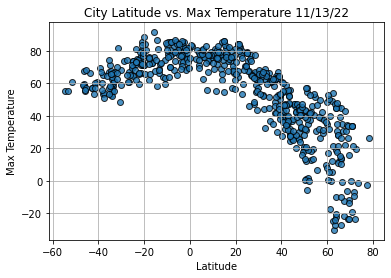

In [23]:
#create a scatter plot of weather data - Max temps 
plt.scatter(lats,max_temps,
            edgecolor="black",
           linewidth=1,
           marker="o",
           alpha=0.8,
           label="Cities")

#label graph
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid(True)

plt.show()

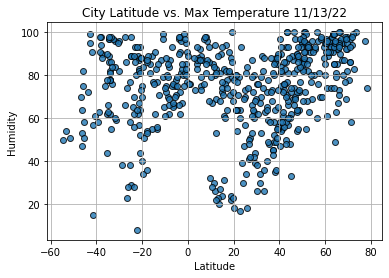

In [24]:
#Humnidty plot
plt.scatter(lats,humidity,
            edgecolor="black",
           linewidth=1,
           marker="o",
           alpha=0.8,
           label="Cities")

#label graph
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

plt.show()

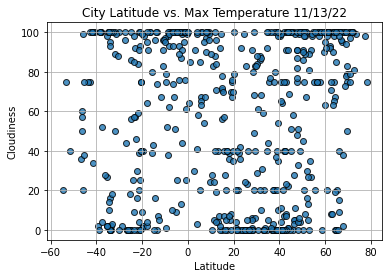

In [25]:
#Cloudiness plot
plt.scatter(lats,cloudiness,
            edgecolor="black",
           linewidth=1,
           marker="o",
           alpha=0.8,
           label="Cities")

#label graph
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

plt.show()

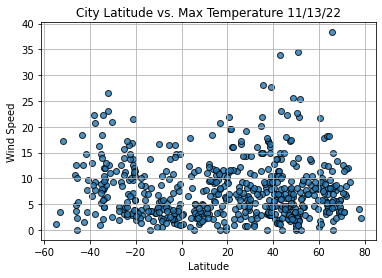

In [26]:
#Wind speed plot
plt.scatter(lats,wind_speed,
            edgecolor="black",
           linewidth=1,
           marker="o",
           alpha=0.8,
           label="Cities")

#label graph
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

plt.show()

In [27]:
#import linear regression from scipy
from scipy.stats import linregress

In [28]:
#create an equal number of latitudes and temps
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [29]:
#linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [30]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

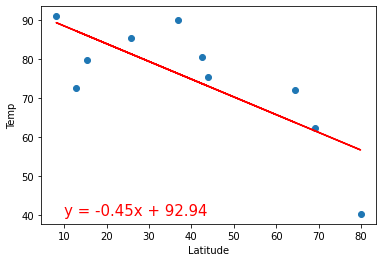

In [31]:
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [32]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [33]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [34]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Jamestown,US,2022-11-14 00:12:23,42.0970,-79.2353,35.19,76,100,11.50
3,Dryden,CA,2022-11-14 00:16:49,49.7833,-92.7503,19.69,86,100,3.44
4,Georgetown,MY,2022-11-14 00:15:19,5.4112,100.3354,80.24,92,20,0.00
7,Ca Mau,VN,2022-11-14 00:16:50,9.1769,105.1500,77.43,93,100,7.63
9,Cabo San Lucas,MX,2022-11-14 00:16:51,22.8909,-109.9124,79.90,64,42,1.01


In [35]:
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2022-11-14 00:16:48,-34.4187,19.2345,52.81,86,10,7.74
1,Kaeo,NZ,2022-11-14 00:16:48,-35.1000,173.7833,71.33,66,2,5.21
5,Cape Town,ZA,2022-11-14 00:12:52,-33.9258,18.4232,62.91,78,16,11.99
6,Sao Joao Da Barra,BR,2022-11-14 00:16:50,-21.6403,-41.0511,75.06,89,84,16.89
8,Isangel,VU,2022-11-14 00:16:51,-19.5500,169.2667,84.31,84,40,3.44


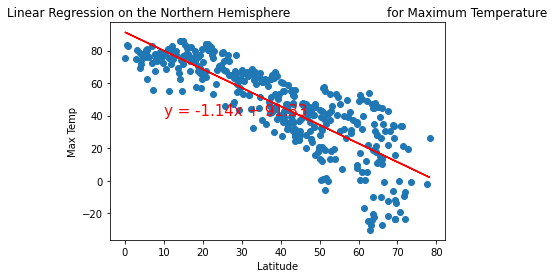

In [36]:
# Linear regression on the Northern Hemisphere for max temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

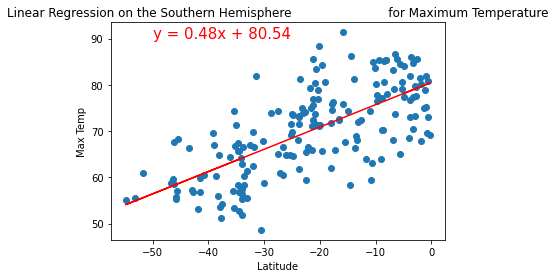

In [37]:
# Linear regression on the Southern Hemisphere for max temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

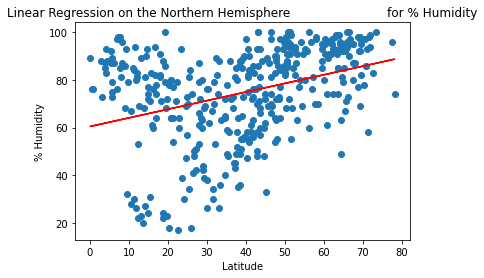

In [38]:
# Linear regression on the Northern Hemisphere for humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

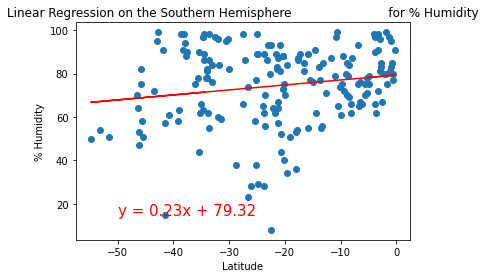

In [39]:
# Linear regression on the Southern Hemisphere for humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

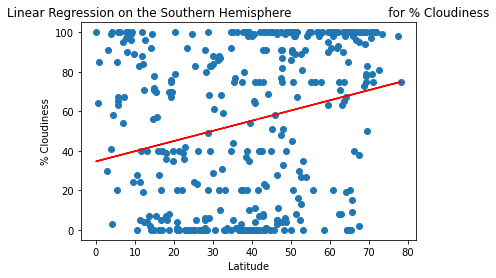

In [40]:
# Linear regression on the Southern Hemisphere for cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

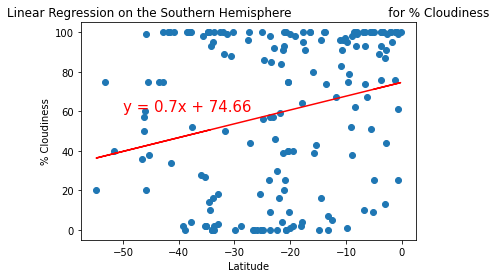

In [41]:
# Linear regression on the Southern Hemisphere for cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

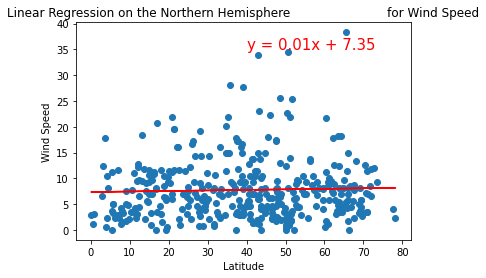

In [42]:
# Linear regression on the Northern Hemisphere for wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

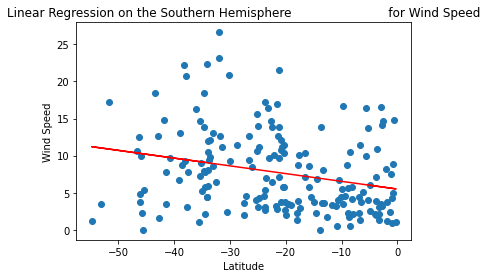

In [43]:
# Linear regression on the Southern Hemisphere for wind speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))